# Face Classification

### Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras import regularizers

from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator 

### Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zipRef = zipfile.ZipFile("/content/drive/My Drive/data.zip", 'r')
zipRef.extractall("/data")
zipRef.close()

In [ ]:
dataDir = '/data/data'

### Keras Data Generator

In [ ]:
batchSize = 16
imgHeight = 200
imgWidth = 200

dataGen = ImageDataGenerator(validation_split=0.2, rescale=1.0/255)

trainGenerator = dataGen.flow_from_directory(dataDir, subset='training', target_size=(imgHeight, imgWidth), class_mode='sparse')
valGenerator = dataGen.flow_from_directory(dataDir, subset='validation', target_size=(imgHeight, imgWidth), class_mode='sparse')

Found 11517 images belonging to 4 classes.
Found 2877 images belonging to 4 classes.


### Check Label Names

In [ ]:
temp = trainGenerator.class_indices

labelNames = dict([(y,x) for x,y in temp.items()])

print(labelNames)

{0: 'asian', 1: 'black', 2: 'indian', 3: 'white'}


### Import VGG 16 Model

In [ ]:
model = None
baseModel = None

In [ ]:
numClasses = 4

baseModel = VGG16(input_shape=(imgHeight, imgWidth, 3), 
                  include_top=False, weights='imagenet', )

baseModel.trainable = False

x = layers.Flatten()(baseModel.output)

x = layers.Dense(100, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.01))(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(50, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.01))(x)

x = layers.Dropout(0.4)(x)

x = layers.Dense(25, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(l2 = 0.01))(x)

x = layers.Dropout(0.2)(x)

x = layers.Dense(numClasses, activation='sigmoid')(x)


model = tf.keras.models.Model(baseModel.input, x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Model summary

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

## Train the model

In [ ]:
epochs=90

vggHistory = model.fit(
  trainGenerator,
  validation_data=valGenerator,
  epochs=epochs
)

Epoch 1/90
360/360 [==============================] - 68s 164ms/step - loss: 4.2258 - accuracy: 0.2931 - val_loss: 3.6778 - val_accuracy: 0.3966
Epoch 2/90
360/360 [==============================] - 53s 146ms/step - loss: 3.5732 - accuracy: 0.3686 - val_loss: 3.2037 - val_accuracy: 0.4119
Epoch 3/90
360/360 [==============================] - 53s 148ms/step - loss: 3.1490 - accuracy: 0.3727 - val_loss: 2.8816 - val_accuracy: 0.4303
Epoch 4/90
360/360 [==============================] - 53s 148ms/step - loss: 2.8583 - accuracy: 0.4073 - val_loss: 2.6634 - val_accuracy: 0.4692
Epoch 5/90
360/360 [==============================] - 53s 147ms/step - loss: 2.6769 - accuracy: 0.4364 - val_loss: 2.5410 - val_accuracy: 0.5047
Epoch 6/90
360/360 [==============================] - 53s 148ms/step - loss: 2.5562 - accuracy: 0.4579 - val_loss: 2.4527 - val_accuracy: 0.5228
Epoch 7/90
360/360 [==============================] - 53s 148ms/step - loss: 2.4891 - accuracy: 0.4516 - val_loss: 2.3708 - val_ac

## Visualize Model Performance

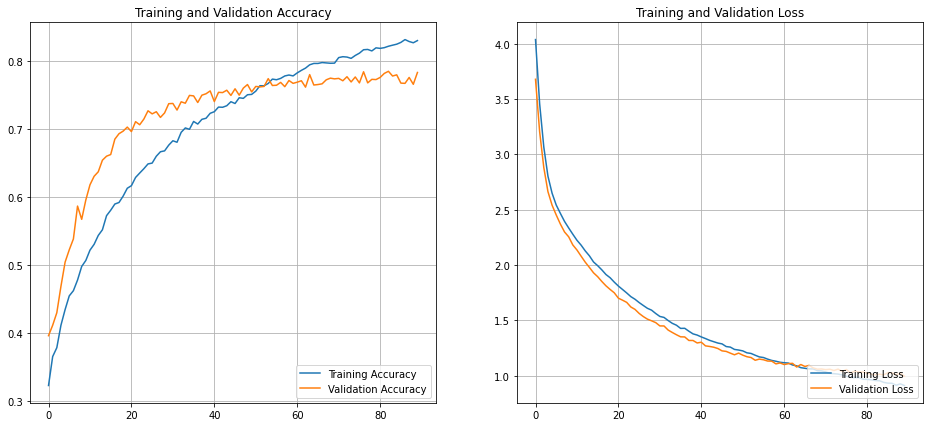

In [ ]:
acc = vggHistory.history['accuracy']
valAcc = vggHistory.history['val_accuracy']

loss = vggHistory.history['loss']
valLoss = vggHistory.history['val_loss']

epochsRange = range(epochs)

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(epochsRange, acc, label='Training Accuracy')
plt.plot(epochsRange, valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochsRange, loss, label='Training Loss')
plt.plot(epochsRange, valLoss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

## Model Fine Tuning

In [ ]:
baseModel.trainable = True

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.000001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs=10

vggHistory = model.fit(
  trainGenerator,
  validation_data=valGenerator,
  epochs=epochs
)

Epoch 1/10
360/360 [==============================] - 152s 408ms/step - loss: 0.9030 - accuracy: 0.8362 - val_loss: 0.9750 - val_accuracy: 0.7946
Epoch 2/10
360/360 [==============================] - 143s 398ms/step - loss: 0.8553 - accuracy: 0.8567 - val_loss: 0.9626 - val_accuracy: 0.8012
Epoch 3/10
360/360 [==============================] - 143s 398ms/step - loss: 0.8386 - accuracy: 0.8579 - val_loss: 0.9430 - val_accuracy: 0.8109
Epoch 4/10
360/360 [==============================] - 143s 399ms/step - loss: 0.8115 - accuracy: 0.8692 - val_loss: 0.9462 - val_accuracy: 0.8088
Epoch 5/10
360/360 [==============================] - 143s 398ms/step - loss: 0.8031 - accuracy: 0.8754 - val_loss: 0.9539 - val_accuracy: 0.8092
Epoch 6/10
360/360 [==============================] - 143s 398ms/step - loss: 0.7900 - accuracy: 0.8763 - val_loss: 0.9463 - val_accuracy: 0.8151
Epoch 7/10
360/360 [==============================] - 144s 399ms/step - loss: 0.7773 - accuracy: 0.8794 - val_loss: 0.9508 -

## Visualize Tuned Model Performance

Create plots of loss and accuracy on the training and validation sets.

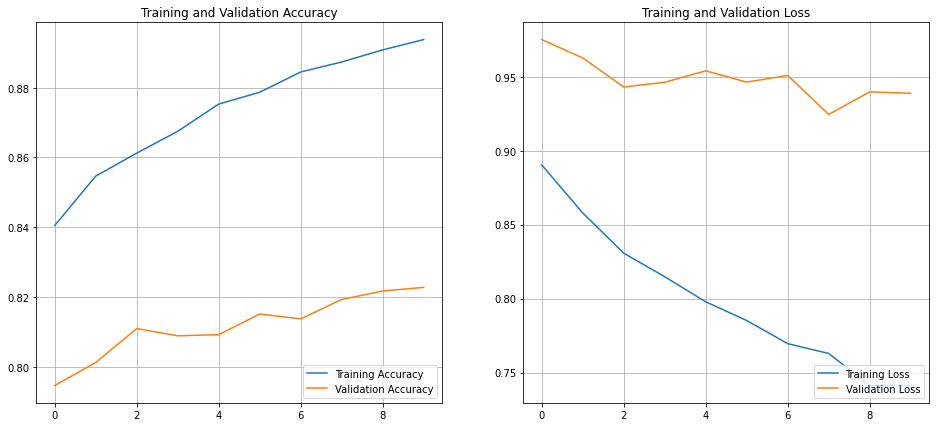

In [ ]:
acc = vggHistory.history['accuracy']
valAcc = vggHistory.history['val_accuracy']

loss = vggHistory.history['loss']
valLoss = vggHistory.history['val_loss']

epochsRange = range(epochs)

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(epochsRange, acc, label='Training Accuracy')
plt.plot(epochsRange, valAcc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochsRange, loss, label='Training Loss')
plt.plot(epochsRange, valLoss, label='Validation Loss')
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()